/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
No handles with labels found to put in legend.


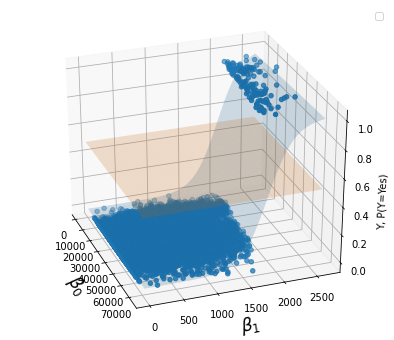

In [3]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm

from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

data = pd.read_csv('Default.csv')
data.loc[(data.default == 'No'),'default'] = 0
data.loc[(data.default == 'Yes'),'default'] = 1


X = data[['income', 'balance']]
X = sm.add_constant(X)

Y = data['default']
Y=Y.astype('int')

regr = skl_lm.LogisticRegression()
logisticFit = regr.fit(X, Y)

fig = plt.figure(figsize=(15,6))
plot = fig.add_subplot(122, projection='3d')

incomeRange = max(X['income']) - min(X['income'])
balanceRange = max(X['balance']) - min(X['balance'])
x = np.arange(min(X['income']), max(X['income']), incomeRange / 100)
y = np.arange(min(X['balance']), max(X['balance']), balanceRange / 100)
xx, yy = np.meshgrid(x, y, sparse=True)


'''
zz = (pow(2, regr.coef_[0][0] + regr.coef_[0][1]*xx + regr.coef_[0][2]*yy) / (1 + pow(2, regr.coef_[0][0] + regr.coef_[0][1]*xx + regr.coef_[0][2]*yy)))
plot.plot_surface (xx, yy, zz, alpha = 0.2)
'''

grid = pd.DataFrame(np.array(np.meshgrid(x, y, )).T.reshape(-1, 2))
grid = sm.add_constant(grid)
zz = logisticFit.predict_proba(grid)
plot.plot_trisurf (grid[0], grid[1], zz.T[1], alpha = 0.2)

predictions = logisticFit.predict(X)

#plot.scatter3D(X['income'], X['balance'], Y)
plot.scatter3D(X['income'], X['balance'], predictions)


aa = np.full((100, 100), 0.5)
plot.plot_surface (xx, yy, aa, alpha = 0.2)

plot.set_zlabel('Y, P(Y=Yes)')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()

ax.view_init(azim=-20)



In [ ]:
zz.shape

(10000, 2)

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=0.5, random_state=42)

logisticFitTraining = regr.fit(X_train, Y_train)
testPredictions = logisticFitTraining.predict(X_test)

i = 0
errors = 0
for real in Y_test:
  if(real != testPredictions[i]):
    errors = errors +1
  i = i+1

error_rate =  errors / Y_test.shape[0]

print(error_rate)



0.0322


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
No handles with labels found to put in legend.


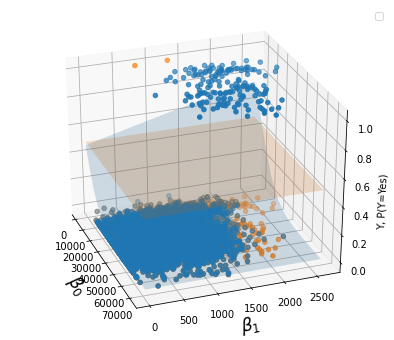

In [ ]:
fig = plt.figure(figsize=(15,6))
plot = fig.add_subplot(122, projection='3d')

plot.scatter3D(X_test['income'], X_test['balance'], Y_test)
plot.scatter3D(X_test['income'], X_test['balance'], testPredictions)

zz = logisticFitTraining.predict_proba(grid)

plot.plot_trisurf (grid[0], grid[1], zz.T[1], alpha = 0.2)
plot.plot_surface (xx, yy, aa, alpha = 0.2)

plot.set_zlabel('Y, P(Y=Yes)')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()

ax.view_init(azim=-20)

In [ ]:
X_train.shape

(9000, 3)

0.035


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.026


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.0252


No handles with labels found to put in legend.


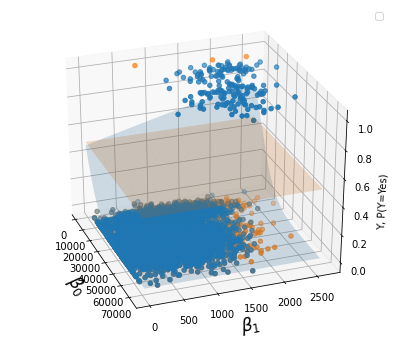

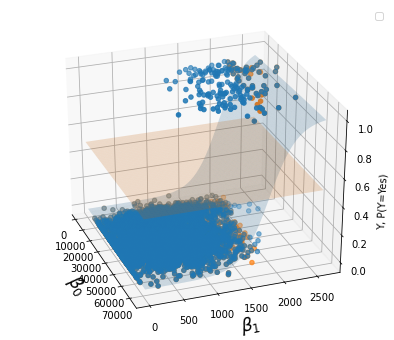

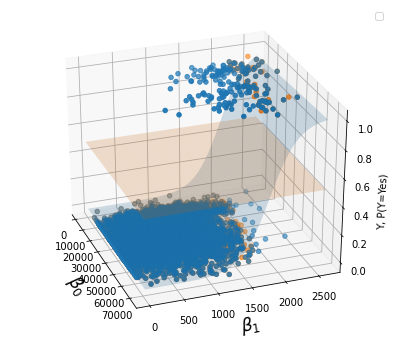

In [35]:
for i in range(3):
  X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=0.5, random_state=43+i)
  logisticFitTraining = regr.fit(X_train, Y_train)
  testPredictions = logisticFitTraining.predict(X_test)

  i = 0
  errors = 0
  for real in Y_test:
    if(real != testPredictions[i]):
      errors = errors +1
    i = i+1

  error_rate =  errors / Y_test.shape[0]
  print(error_rate)

  fig = plt.figure(figsize=(15,6))
  plot = fig.add_subplot(122, projection='3d')

  plot.scatter3D(X_test['income'], X_test['balance'], Y_test)
  plot.scatter3D(X_test['income'], X_test['balance'], testPredictions)

  zz = logisticFitTraining.predict_proba(grid)

  plot.plot_trisurf (grid[0], grid[1], zz.T[1], alpha = 0.2)
  plot.plot_surface (xx, yy, aa, alpha = 0.2)

  plot.set_zlabel('Y, P(Y=Yes)')

  # settings common to both plots
  for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()

  ax.view_init(azim=-20)



In [36]:
data.loc[(data.student == 'No'),'student'] = 0
data.loc[(data.student == 'Yes'),'student'] = 1
data['student'] = data['student'].astype(int)

X=data[['income', 'balance', 'student']]
X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size=0.5, random_state=42)
logisticFitTraining = regr.fit(X_train, Y_train)
testPredictions = logisticFitTraining.predict(X_test)

i = 0
errors = 0
for real in Y_test:
  if(real != testPredictions[i]):
    errors = errors +1
  i = i+1

error_rate =  errors / Y_test.shape[0]
print(error_rate)

0.0288


array([[-2.56962322e+00, -1.04834980e-04,  4.88995433e-03,
        -3.44622279e+00]])